In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import control as ctrl
from scipy.signal import butter, filtfilt, bilinear

print("Setup Complete")

Setup Complete


In [2]:
ppg_filepath = "../data/raw_ppg_data_100hz.csv"

ppg_data = pd.read_csv(ppg_filepath, nrows = 5000)

In [3]:
# Apply filter using coefficients in z-domain
def apply_filter(data, b, a):
    data = np.asarray(data, dtype = np.float64)  # Input: float64
    y = np.zeros_like(data, dtype = np.float64)  # Output: float64
    for i in range(len(data)):
        y[i] = b[0] * data[i]
        for j in range(1, len(b)):
            if i-j >= 0:
                y[i] += b[j] * data[i-j]
        for j in range(1, len(a)):
            if i-j >= 0:
                y[i] -= a[j] * y[i-j]
    return y

In [4]:
# LPF params:
# fs = 100.0
# ws = 12
# wp = 3
# wc = 4
# order = 4

b_z_low = [0.000177296607979, 0.000709186431917, 0.001063779647875, 0.000709186431917, 0.000177296607979]
a_z_low = [1, -3.349831562667920, 4.252610698953553, -2.420450670140820, 0.520508279582855]

# Apply LPF
low_pass_filtered_sig = apply_filter(ppg_data, b_z_low, a_z_low)

# HPF params:
# fs = 100.0
# ws = 0.0005
# wp = 0.01
# wc = 0.005
# order = 2

b_z_high = [0.999777886079662, -1.999555772159325, 0.999777886079662]
a_z_high = [1, -1.999555722824731, 0.999555821493919]

# Apply HPF
high_pass_filtered_sig = apply_filter(low_pass_filtered_sig, b_z_high, a_z_high)

filtered_sig = high_pass_filtered_sig

In [5]:
print(filtered_sig)
print(ppg_data)

[[ 1.79534840e-01]
 [ 1.49206795e+00]
 [ 6.17984449e+00]
 ...
 [-2.52256417e+02]
 [-3.34269142e+02]
 [-4.03526594e+02]]
      765.8272976114961
0           1012.849189
1            973.708571
2           1004.409658
3            973.035406
4            987.171079
...                 ...
4995         856.425438
4996         961.843097
4997         904.465238
4998         996.032260
4999         939.301455

[5000 rows x 1 columns]


<Axes: >

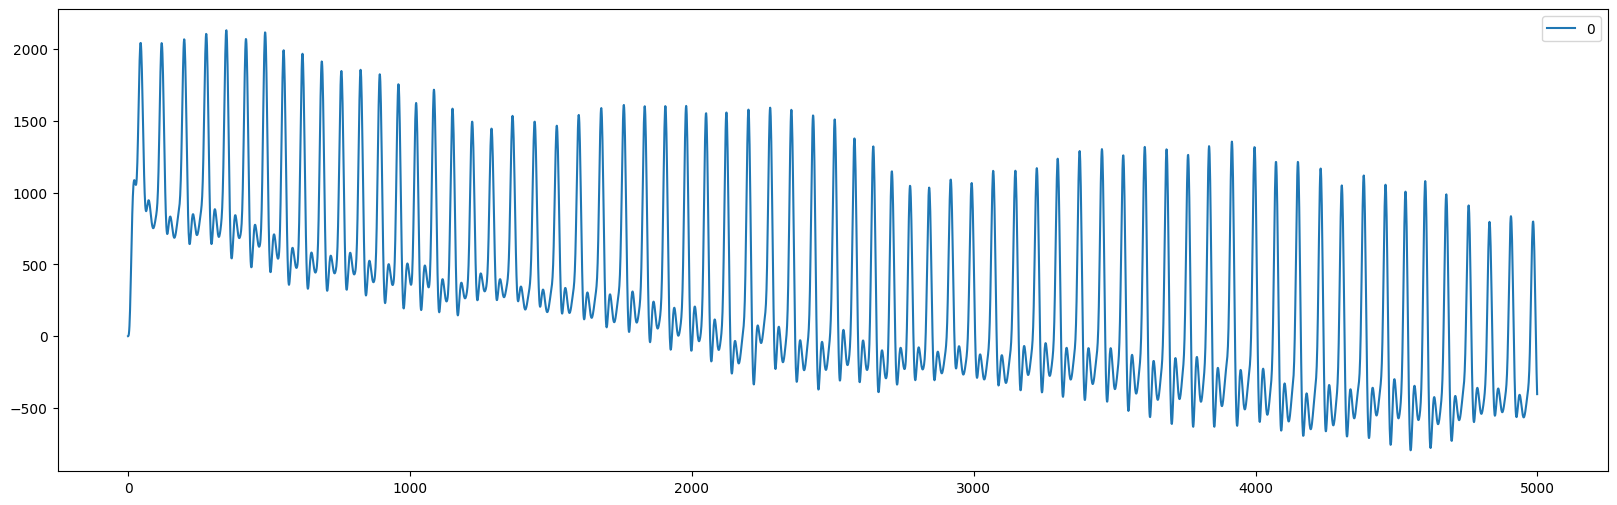

In [6]:
# Hiển thị tín hiệu trước và sau khi lọc
plt.figure(figsize = (20,6))
sns.lineplot(data = filtered_sig)